Topic: Challenge Set **3** <br> Subject: Pandas (Exploring and visualizing our scraped movie data in pandas) <br> Date: 09/25/2017 <br> Name: Kenny Leung <br> Worked with: -- <br>Location: sf17_ds8/student_submissions/challenges/03-pandas/leung_kenny/challenge_set_3_kenny.ipynb

In [2]:
import sys
print("Python Version:", sys.version)

Python Version: 3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dateutil.parser

%matplotlib inline

In [4]:
sns.set_style('whitegrid')

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
df = pd.read_csv('2013_movies.csv')

In [7]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [8]:
df.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

### Challenge 1

In [9]:
df['Datetime'] = df['ReleaseDate'].apply(dateutil.parser.parse)

In [15]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Datetime
0,The Hunger Games: Catching Fire,130000000.000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,2013-11-22
1,Iron Man 3,200000000.000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,2013-05-03
2,Frozen,150000000.000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,2013-11-22
3,Despicable Me 2,76000000.000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,2013-07-03
4,Man of Steel,225000000.000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,2013-06-14


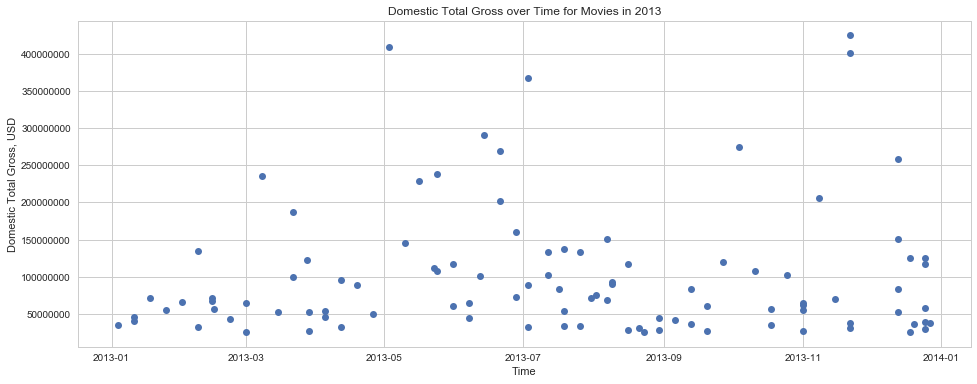

In [19]:
plt.figure(figsize=(16,6))
plt.plot_date(x='Datetime',y='DomesticTotalGross',data=df,)
plt.title('Domestic Total Gross over Time for Movies in 2013') 
plt.xlabel('Time')
plt.ylabel('Domestic Total Gross, USD')

plt.ticklabel_format(style='plain', axis='y')

### Challenge 2

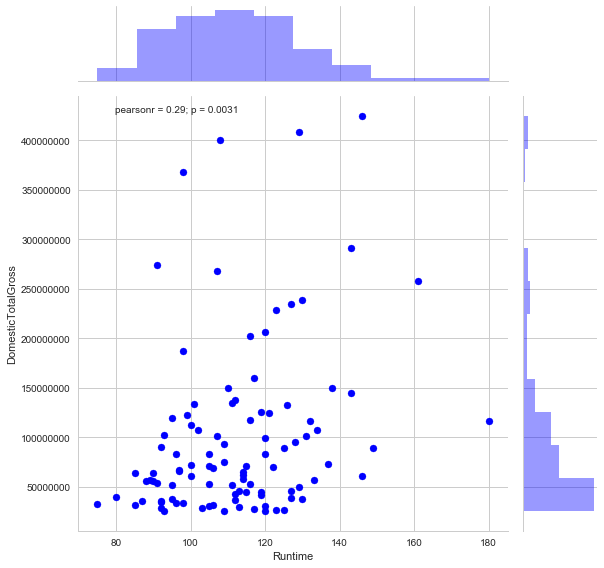

In [158]:
sns.jointplot(x='Runtime', y='DomesticTotalGross', data=df, color='blue',size=8)
plt.ticklabel_format(style='plain', axis='y')

### Challenge 3

In [47]:
df3 = df \
.groupby('Rating') \
.mean() \
.drop(['Budget'],axis=1)

In [50]:
df3

,DomesticTotalGross,Runtime
Rating,,
G,268492764.000,107.000
PG,131135716.067,99.933
PG-13,111449769.021,117.511
R,69892429.000,110.730


### Challenge 4

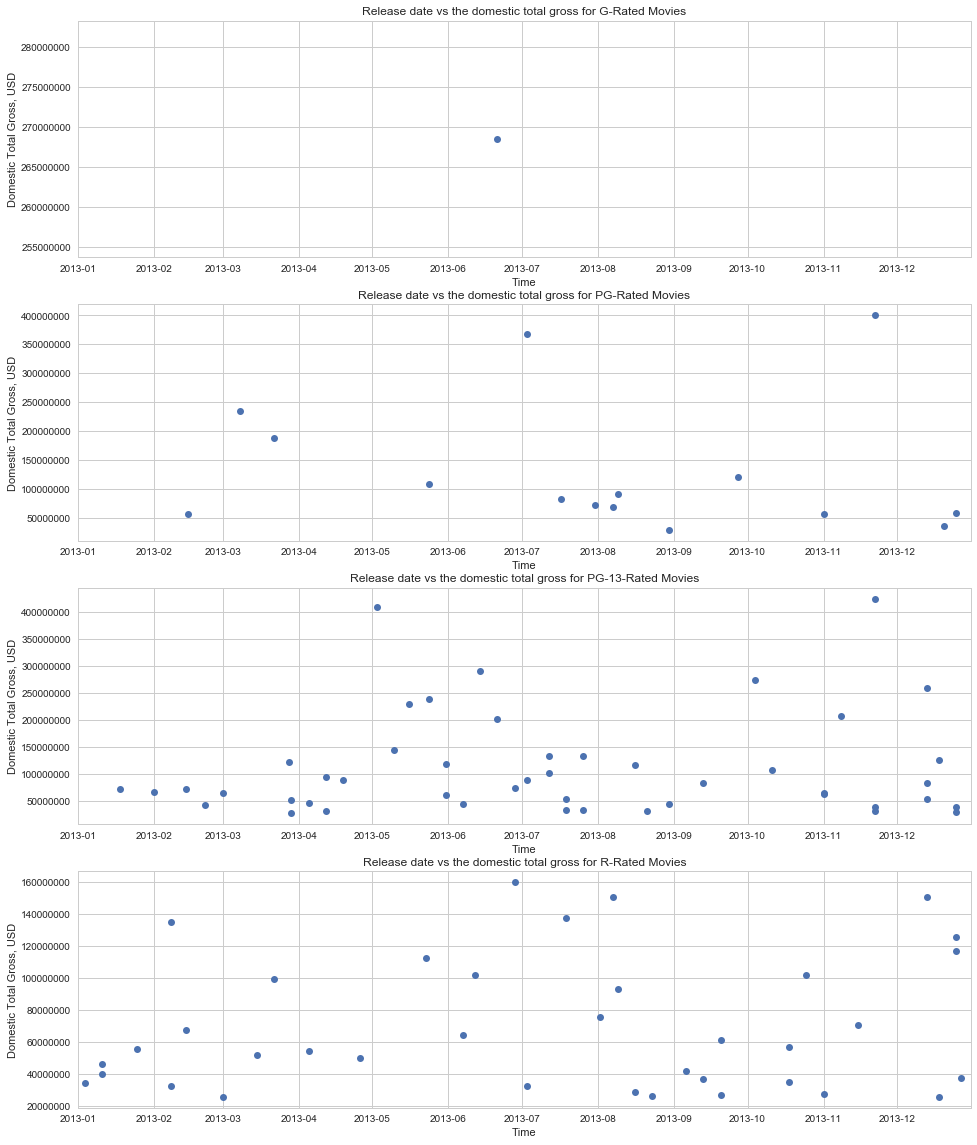

In [157]:
fig, axes = plt.subplots(4, 1, figsize=(16,20))

axes[0].plot_date(x='Datetime',y='DomesticTotalGross',data=df[df['Rating']=='G'])
axes[0].set_xlim(pd.Timestamp('2013-01-01'), pd.Timestamp('2013-12-31'))
axes[0].set_title("Release date vs the domestic total gross for G-Rated Movies")
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Domestic Total Gross, USD')
axes[0].ticklabel_format(style='plain', axis='y')

axes[1].plot_date(x='Datetime',y='DomesticTotalGross',data=df[df['Rating']=='PG'])
axes[1].set_xlim(pd.Timestamp('2013-01-01'), pd.Timestamp('2013-12-31'))
axes[1].set_title("Release date vs the domestic total gross for PG-Rated Movies")
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Domestic Total Gross, USD')
axes[1].ticklabel_format(style='plain', axis='y')

axes[2].plot_date(x='Datetime',y='DomesticTotalGross',data=df[df['Rating']=='PG-13'])
axes[2].set_xlim(pd.Timestamp('2013-01-01'), pd.Timestamp('2013-12-31'))
axes[2].set_title("Release date vs the domestic total gross for PG-13-Rated Movies")
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Domestic Total Gross, USD')
axes[2].ticklabel_format(style='plain', axis='y')

axes[3].plot_date(x='Datetime',y='DomesticTotalGross',data=df[df['Rating']=='R'])
axes[3].set_xlim(pd.Timestamp('2013-01-01'), pd.Timestamp('2013-12-31'))
axes[3].set_title("Release date vs the domestic total gross for R-Rated Movies")
axes[3].set_xlabel('Time')
axes[3].set_ylabel('Domestic Total Gross, USD')
axes[3].ticklabel_format(style='plain', axis='y')

### Challenge 5

In [111]:
df5 = df \
.groupby('Director') \
.mean() \
.drop(['Budget','Runtime'],axis=1) \
.sort_values(by='DomesticTotalGross',ascending=False).head(5)

In [112]:
df5

,DomesticTotalGross
Director,
Francis Lawrence,424668047.000
Shane Black,409013994.000
Chris BuckJennifer Lee,400738009.000
Pierre CoffinChris Renaud,368061265.000
Zack Snyder,291045518.000


### Challenge 6

In [22]:
df['Month'] = df['Datetime'].apply(lambda x: x.month)

In [23]:
df6 = df \
.groupby('Month') \
.mean() \
.drop(['Budget','Runtime'], axis=1)

In [24]:
df6

,DomesticTotalGross
Month,
1,49543237.200
2,67386013.714
3,96097096.222
4,60940719.500
5,177409720.500
6,150650005.750
7,105780721.917
8,68531263.091
9,61712314.333


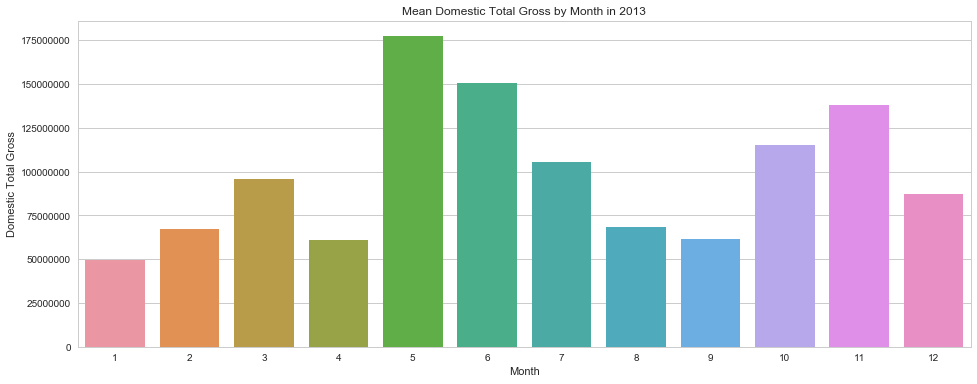

In [37]:
plt.figure(figsize=(16,6))
ax = sns.barplot(x=df6.index.values,y='DomesticTotalGross',data=df6)
plt.title('Mean Domestic Total Gross by Month in 2013') 
plt.xlabel('Month')
plt.ylabel('Domestic Total Gross')

plt.ticklabel_format(style='plain', axis='y')